In [1]:
import pandas as pd
import numpy as np
import scipy
import statsmodels
from statsmodels.stats.weightstats import *
from matplotlib import pyplot as plt
from statsmodels.stats.proportion import proportion_confint
from sklearn.preprocessing import scale

In [2]:
data = pd.read_csv('credit_card_default_analysis.csv')

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data0 = data[data.default == 0]
data1 = data[data.default == 1]

In [5]:
data0.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0


In [6]:
data1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,0,0,0,0,...,0,632,316,316,316,0,632,316,0,1


### T1

a)Гипотеза о равенстве медианных значений кредитного лимита

Проверим данные на нормальность распределения

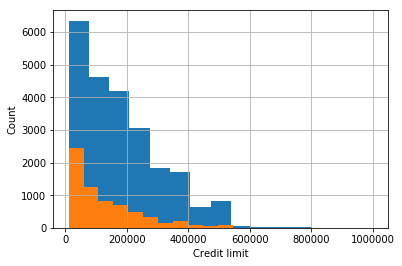

In [7]:
plt.hist(data0.LIMIT_BAL, bins=15)
plt.hist(data1.LIMIT_BAL, bins=15)
plt.grid()
plt.xlabel('Credit limit')
plt.ylabel('Count')
plt.show()

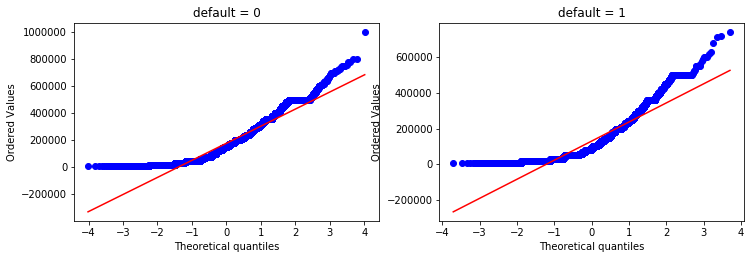

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
stats.probplot(data0.LIMIT_BAL, dist="norm", plot=plt)
plt.title('default = 0')
plt.subplot(2,2,2)
stats.probplot(data1.LIMIT_BAL, dist="norm", plot=plt)
plt.title('default = 1')
plt.show()

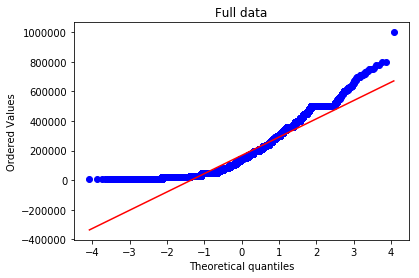

In [9]:
stats.probplot(data.LIMIT_BAL, dist="norm", plot=plt)
plt.title('Full data')
plt.show()

Q-Q график явно не похож на прямую, следовательно распределение не нормальное

Выборки независимы (в выборках участвуют разные объекты)
Используем бутстреп для проверки равенства медианных значений.

H0: med0 = med1;  
H1: med0 <> med1

In [10]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [11]:
data0_med_samples = list(map(np.median, get_bootstrap_samples(data0.LIMIT_BAL.to_numpy(), 1000)))
data1_med_samples = list(map(np.median, get_bootstrap_samples(data1.LIMIT_BAL.to_numpy(), 1000)))

In [12]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(data0_med_samples, data1_med_samples)))

In [13]:
stat_intervals(delta_median_scores, 0.05)

array([-70000., -60000.])

Так как 0 не входит в данную интервальную оценку, можно сказать, что медианные значения выборок отличаются

b)Гипотеза о равенстве распределений

Используем перестановочный критерий для независимых выборок, так как он проверяет гипотезу о равенстве распределений.

H0: Fx1(x) = Fx2(x);

H1: Fx1(x) = Fx2(x + delta), delta <> 0;

In [14]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)
    
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [15]:
permutation_test(data0.LIMIT_BAL, data1.LIMIT_BAL, max_permutations = 10000)

0.0001

Можно отвергнуть нулевую гипотезу на пороге 0.05 при полученном достигаемом уровне значимости

Можно сказать, что выводы по данным гипотезам могут нести практическую значимость. Мы видим, что при более крупной средней сумме кредитного лимита клиенты более склонны к возврату кредита. Возможно, что малый кредитный лимит означает, что к клиенту не хватило доверия для крупного лимита, но при этом кредит всё равно был выдан, а в результате клиент не смог его вернуть. Точнее может сказать специалист.

### T2

Гипотеза о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается

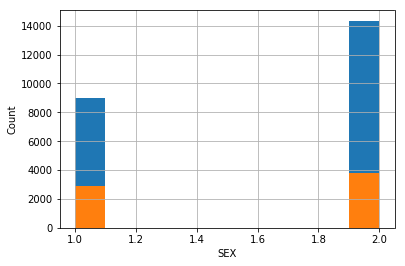

In [16]:
plt.hist(data0.SEX)
plt.hist(data1.SEX)
plt.grid()
plt.xlabel('SEX')
plt.ylabel('Count')
plt.show()

In [17]:
#Я заменил 1 и 2 на 0 и 1, потому что я могу
data0['SEX'] = data0.SEX.apply(lambda x: 1 if x==2 else 0)
data1['SEX'] = data1.SEX.apply(lambda x: 1 if x==2 else 0)

D:\Conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


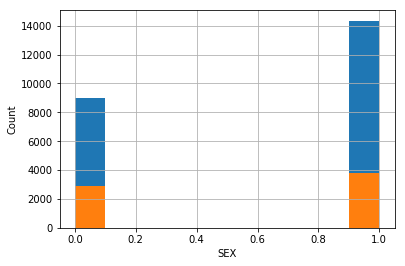

In [18]:
#Проверил, что после преобразования гистограммы не изменились
plt.hist(data0.SEX)
plt.hist(data1.SEX)
plt.grid()
plt.xlabel('SEX')
plt.ylabel('Count')
plt.show()

Воспользуемся Z-критерием для двух не связанных между собой долей


H0: p1 = p1;

H1: p1 <> p2

In [19]:
#Таблица сопряжённости
matrix_T2 = np.array([[data0.SEX.value_counts()[1], data1.SEX.value_counts()[1]], 
                      [data0.SEX.value_counts()[0], data1.SEX.value_counts()[0]]])

In [20]:
matrix_T2

array([[14349,  3763],
       [ 9015,  2873]], dtype=int64)

In [21]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [22]:
proportions_diff_confint_ind(data0.SEX, data1.SEX)

(0.03363493274962867, 0.060548077974896725)

In [23]:
proportions_diff_z_test(proportions_diff_z_stat_ind(data0.SEX, data1.SEX))

4.472866521609831e-12

Достигаемый уровень значимости близок к нулю, следовательно нулевая гипотеза о равенстве распределений отвергается при  пороге 0.05, также 0 не входит в доверительный интервал для разности долей, значит доли в выборках отличаются

### T3

Гипотеза о том, что образование не влияет на то, вернет ли человек долг.


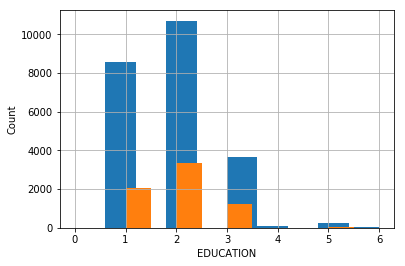

In [24]:
plt.hist(data0.EDUCATION)
plt.hist(data1.EDUCATION)
plt.grid()
plt.xlabel('EDUCATION')
plt.ylabel('Count')
plt.show()

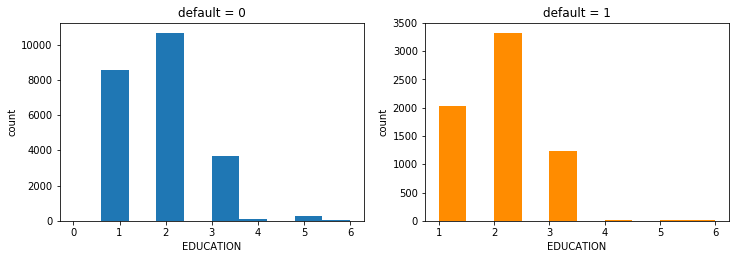

In [25]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(data0.EDUCATION)
plt.title('default = 0')
plt.xlabel('EDUCATION')
plt.ylabel('count')
plt.subplot(2,2,2)
plt.hist(data1.EDUCATION, color = 'darkorange')
plt.title('default = 1')
plt.xlabel('EDUCATION')
plt.ylabel('count')
plt.show()

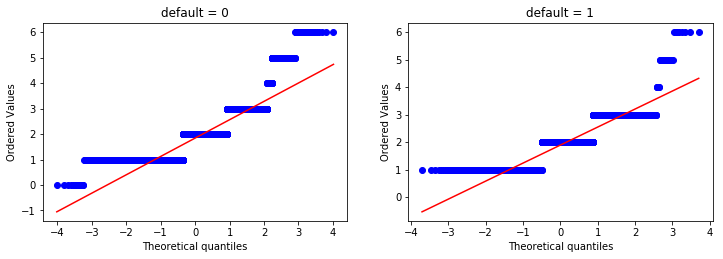

In [26]:
#Очевидно, что это не нормальное распределение, но мне нравятся Q-Q графики, поэтому нестрого проверим нормальность
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
stats.probplot(data0.EDUCATION, dist="norm", plot=plt)
plt.title('default = 0')
plt.subplot(2,2,2)
stats.probplot(data1.EDUCATION, dist="norm", plot=plt)
plt.title('default = 1')
plt.show()

In [27]:
data.EDUCATION.describe()

count    30000.000000
mean         1.853133
std          0.790349
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: EDUCATION, dtype: float64

Из графиков видно, что среди клиентов, вернувших кредит, больше бакалавров и магистров. Можно предположить, что у людей, вернувших кредит, уровень образования выше.

Чтобы проверить влияние образования клиента на возврат кредита, проверим, равномерно ли распределён уровень образования по обеим группам. Для этого найдем ожидаемое и наблюдаемое количество клиентов, которые вернули и не вернули долг, и воспользуемся критерием chisquared.

H0: x ~ U;

H1: x !~ U

In [28]:
data0_edu = np.array([data0.EDUCATION[data0.EDUCATION == i].count() for i in range(0, 7)])
data1_edu = np.array([data1.EDUCATION[data1.EDUCATION == i].count() for i in range(0, 7)])

In [29]:
result = stats.binned_statistic_2d(data0_edu, data1_edu, None, 'count', bins=6)
for_chisquare = np.array([x for row in result.statistic for x in row])

In [30]:
expected_mean = result.statistic.mean()
expected_mean

0.19444444444444445

In [31]:
stats.chisquare(for_chisquare, expected_mean, ddof = 0)

Power_divergenceResult(statistic=90.71428571428568, pvalue=7.803525331791953e-07)

На уровне значимости 0.05 можно отвергнуть нулевую гипотезу о равномерном распределении уровня образования между двумя группами клиентов банка. Следовательно уровень образования влияет на то, вернет клиент кредит или нет.

In [32]:
expected_edu_0 = result.x_edge
expected_edu_1 = result.y_edge

Построим таблицу сопряженности, строки - default, столбцы - Observed_EDUCATION и Expected_EDUCATION

In [33]:
confusion_matrix = pd.DataFrame([data0_edu - expected_edu_0, data1_edu - expected_edu_1])
confusion_matrix.head()

,0,1,2,3,4,5,6
0,0.0,6754.0,7124.0,-1677.0,-7022.0,-8657.0,-10657.0
1,0.0,1481.0,2220.0,-428.0,-2213.0,-2757.0,-3322.0


Для масштабирования воспользуемся стандартизацией.

In [34]:
scaled_conf_matrix = scale([data0_edu - expected_edu_0, data1_edu - expected_edu_1])
scaled_conf_matrix

array([[ 0.,  1.,  1., -1., -1., -1., -1.],
       [ 0., -1., -1.,  1.,  1.,  1.,  1.]])

Лучшим индикатором того, что клиент вернет кредит, является наличие высшего образования, а того, что не вернет - наличие среднего образования.

### T4

Как связан семейный статус с индикатором возврата долга?

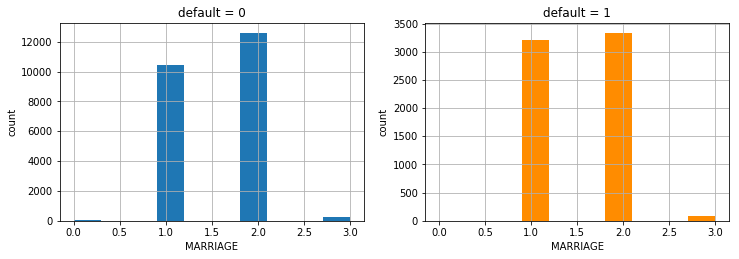

In [35]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(data0.MARRIAGE)
plt.title('default = 0')
plt.xlabel('MARRIAGE')
plt.ylabel('count')
plt.grid()
plt.subplot(2,2,2)
plt.hist(data1.MARRIAGE, color = 'darkorange')
plt.title('default = 1')
plt.xlabel('MARRIAGE')
plt.ylabel('count')
plt.grid()
plt.show()

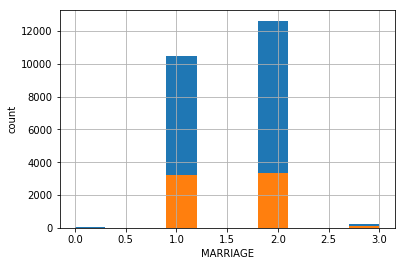

In [36]:
plt.hist(data0.MARRIAGE)
plt.hist(data1.MARRIAGE)
plt.xlabel('MARRIAGE')
plt.ylabel('count')
plt.grid()
plt.show()

По гистограммам видно, что доминируют значения "женат" и "холост", что логично, так как это все возможные варианты семейного положения. Мы можем предположить, что значимой взаимосвязи между семейным статусом и возвратом долга нет.

От нас требуется посчитать корреляцию между замужеством и возвратом долга. Так как данные категориальны, мы можем воспользоваться обобщённым критерием хи-квадрат или коэффициентом V-Крамера. 

В данном случае нам необходимо именно измерить корреляцию между двумя признаками, и для этого мы воспользуемся коэффициентом V-Крамера. Критерий хи-квадрат проверяет нулевую гипотезу о том, что признаки независимы (по сути проверяет равенство нулю коэффициента V-Крамера), и следовательно нам не подходит в данной задаче.

In [37]:
confusion_matrix = pd.crosstab(data['MARRIAGE'], data['default'])

In [38]:
confusion_matrix

default,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


In [39]:
def cramers_corrected_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - (((k-1)*(r-1))/(n-1)))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [41]:
cramers_corrected_stat(np.array(confusion_matrix))

0.03299665874336609

Коэффициент корреляции близок к нулю, следовательно признаки слабо зависят друг от друга

### T5

#### Признак AGE

a)Гипотеза о равенстве медианных значений возрастов людей

H0: med0 = med1;  
H1: med0 <> med1

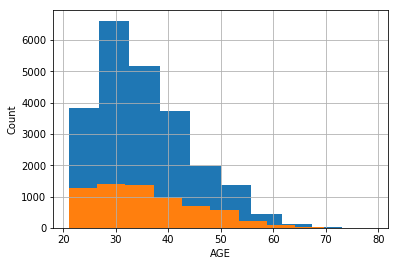

In [97]:
plt.hist(data0.AGE)
plt.hist(data1.AGE)
plt.grid()
plt.xlabel('AGE')
plt.ylabel('Count')
plt.show()

Нестрого проверим данные на нормальность


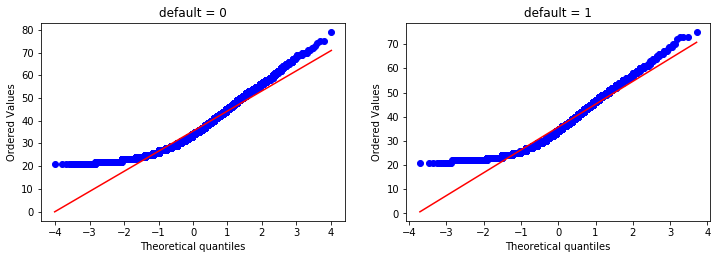

In [98]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
stats.probplot(data0.AGE, dist="norm", plot=plt)
plt.title('default = 0')
plt.subplot(2,2,2)
stats.probplot(data1.AGE, dist="norm", plot=plt)
plt.title('default = 1')
plt.show()

Графики не похожи на прямую, можно сказать, что распределения не являются нормальными. В таком случае воспользуемся бутстрепом для проверки равенства медианных значений, так как выборки независимы

In [99]:
data0_age_med_samples = list(map(np.median, get_bootstrap_samples(data0.AGE.to_numpy(), 1000)))
data1_age_med_samples = list(map(np.median, get_bootstrap_samples(data1.AGE.to_numpy(), 1000)))

In [100]:
delta_age_median_scores = list(map(lambda x: x[1] - x[0], zip(data0_age_med_samples, data1_age_med_samples)))
stat_intervals(delta_age_median_scores, 0.05)

array([0., 1.])

0 входит в полученный интервал, следовательно мы не можем отвергнуть нулевую гипотезу о равенстве медианных значений

б)Гипотеза о равенстве распределений признака AGE в случае возврата/невозврата кредита

H0: F0(x) = F1(x);

H1: F0(x) = F1(x + dx), dx <> 0

Воспользуемся критерием Манна-Уитни, так как мы имеем дело с двумя независимыми дискретными выборками, не имеющими нормальное распределение.

In [101]:
stats.mannwhitneyu(data0.AGE, data1.AGE)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.1862517717449308)

Полученный достигаемый уровень значимости не позволяет отвергнуть нулевую гипотезу на уровне 0.05

На практике нас больше волнуют средние значения, чем равенство распределений. По доверительному интервалу мы можем сделать вывод о том, что медианные значения обеих выборок не различаются, что может говорить о том, что средний возраст заёмщиков обеих групп одинаковый. И это означает, что признак возраста не играет большой роли при возврата долга.